# Returns

In [2]:
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

/home/itamar/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
JSL = web.DataReader('JSLG3.SA',data_source='yahoo',start = '2000-1-1')

In [4]:
JSL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-04-22,8.09,7.70,8.00,8.00,3200400.0,6.506238
2010-04-23,8.05,8.01,8.01,8.02,376500.0,6.522504
2010-04-26,8.03,7.80,8.00,8.01,451400.0,6.514371
2010-04-27,8.00,7.91,8.00,7.95,923000.0,6.465573
2010-04-28,8.00,7.90,8.00,7.95,232700.0,6.465573


In [5]:
JSL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-25,19.860001,18.650000,18.799999,18.750000,1202900.0,18.750000
2020-05-26,20.340000,19.090000,19.590000,19.709999,1702300.0,19.709999
2020-05-27,20.990000,19.530001,19.780001,20.930000,1330700.0,20.930000
2020-05-28,20.930000,20.120001,20.930000,20.200001,1163000.0,20.200001
2020-05-29,0.000000,0.000000,0.000000,20.340000,0.0,20.340000


## Simple Rate of Return
$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} -1
$$

In [6]:
JSL['simple_return'] = (JSL['Adj Close']/JSL['Adj Close'].shift(1)) -1

In [7]:
JSL.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2010-04-22,8.09,7.70,8.00,8.00,3200400.0,6.506238,NaN
2010-04-23,8.05,8.01,8.01,8.02,376500.0,6.522504,0.002500
2010-04-26,8.03,7.80,8.00,8.01,451400.0,6.514371,-0.001247
2010-04-27,8.00,7.91,8.00,7.95,923000.0,6.465573,-0.007491
2010-04-28,8.00,7.90,8.00,7.95,232700.0,6.465573,0.000000


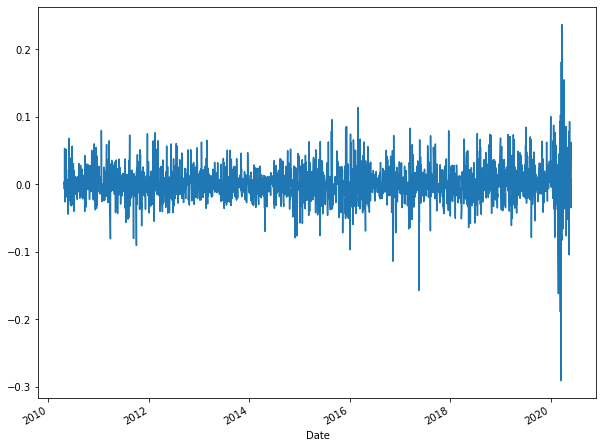

In [8]:
JSL['simple_return'].plot(figsize = (10,8))
plt.show()

In [9]:
avg_return = JSL['simple_return'].mean()
avg_return

0.000828471305649851

**Negotiation days in year vary from 249 - 252**

In [10]:
avg_return_anual = JSL['simple_return'].mean()*250
avg_return_anual

0.20711782641246276

In [11]:
print(str(round(avg_return_anual,4) * 100) + " %")

20.71 %


## Log Returns
$$
\ln(\frac{P_t}{P_{t-1}})
$$

In [12]:
JSL.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2010-04-22,8.09,7.70,8.00,8.00,3200400.0,6.506238,NaN
2010-04-23,8.05,8.01,8.01,8.02,376500.0,6.522504,0.002500
2010-04-26,8.03,7.80,8.00,8.01,451400.0,6.514371,-0.001247
2010-04-27,8.00,7.91,8.00,7.95,923000.0,6.465573,-0.007491
2010-04-28,8.00,7.90,8.00,7.95,232700.0,6.465573,0.000000


In [14]:
JSL['log_return'] = np.log(JSL['Adj Close']/JSL['Adj Close'].shift(1))
print(JSL['log_return'])

Date
2010-04-22         NaN
2010-04-23    0.002497
2010-04-26   -0.001248
2010-04-27   -0.007519
2010-04-28    0.000000
                ...   
2020-05-25    0.019931
2020-05-26    0.049932
2020-05-27    0.060057
2020-05-28   -0.035501
2020-05-29    0.006907
Name: log_return, Length: 2499, dtype: float64


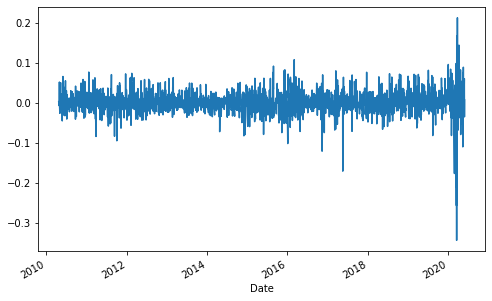

In [15]:
JSL['log_return'].plot(figsize=(8,5))
plt.show()

### Calculando log retorno diário e anual

In [16]:
log_return_d = JSL['log_return'].mean()
log_return_d

0.00045629620429893955

In [17]:
log_return_a = JSL['log_return'].mean()*250
log_return_a

0.1140740510747349

In [18]:
print(str(round(log_return_a,5)* 100) + ' %')

11.407 %


**Podemos ver que os resultados dos retornos simples e logaritmicos tiveram uma diferença grande**